## Practice Notebook for Lake data

This notebook will go through three steps: loading a data set, plotting a map, and plotting a time series of certain statistics

### Loading a data set with xarray

In [1]:
#Setting the scene
#Ignore the warnings!
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Here we load a data set of variables from Lake Tanganyika
#This is a data set of monthly mean lake water data from 2000-2013
#private/data /ESACCI-LAKES-200201-201312_Tanganyika.nc

filename = "data/ESACCI-LAKES-L3S-LK_PRODUCTS-MERGED_20140101-20181231_Tanganyika.nc"
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:                         (lat: 721, lon: 265, time: 1826)
Coordinates:
  * lat                             (lat) float32 -8.996 -8.988 ... -2.996
  * lon                             (lon) float32 29.0 29.01 29.02 ... 31.2 31.2
  * time                            (time) datetime64[ns] 2014-01-01 ... 2018...
Data variables:
    lake_surface_water_temperature  (time, lat, lon) float32 ...
    lswt_quality_level              (time, lat, lon) float32 ...
    chla_mean                       (time, lat, lon) float32 ...
    turbidity_mean                  (time, lat, lon) float32 ...
    Rw620                           (time, lat, lon) float32 ...
Attributes: (12/45)
    conventions:                     CF-1.7
    title:                           ESA Lakes_cci product
    institution:                     LWL: Laboratoire d'Etudes en Geodesie et...
    source:                          LWL: European Space Agency (ESA), Nation...
    history:                         LWL: Generated by Laboratoire d'Etudes e...
    references:                      http://cci.esa.int/lakes
    ...                              ...
    id:                              ESACCI-LAKES-L3S-LK_PRODUCTS-MERGED-2014...
    date_created:                    2020-05-08
    time_coverage_start:             2014-01-01
    time_coverage_end:               2014-01-01
    creator_email:                   lakes_cci@groupcls.com
    DODS_EXTRA.Unlimited_Dimension:  time

## Plotting a few maps

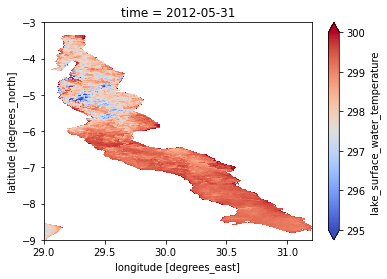

In [3]:
#First we plot a map of LSWT on a certain date
#Note that the date in the map title is the last day of the averaged month

year = 2012
month = 4
timestr = str('%4d-%02d' % (year, month+1))
ds.lake_surface_water_temperature.sel({'time': timestr}).plot(cmap='coolwarm', vmin=295, vmax=300)  # I like the coolwarm colour map for temperature!


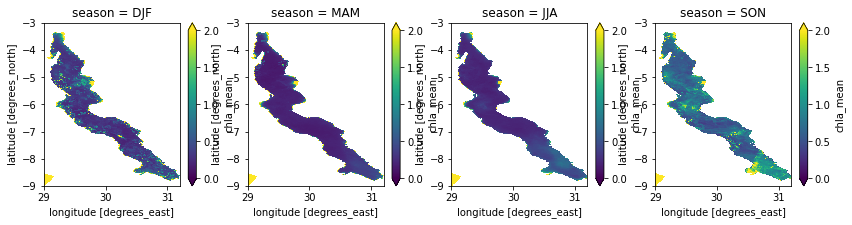

In [4]:
# Now let's plot seasonally averaged ChlA values

ds_seasmean = ds.groupby("time.season").mean()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 3))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_seasmean.chla_mean.sel(season=season).plot(
        ax=axes[i],
        vmin=0,
        vmax=2,
        cmap="viridis",
        add_colorbar=True,
        extend="both",
    )

In [ ]:
plt.savefig('seasonal variatio.png')

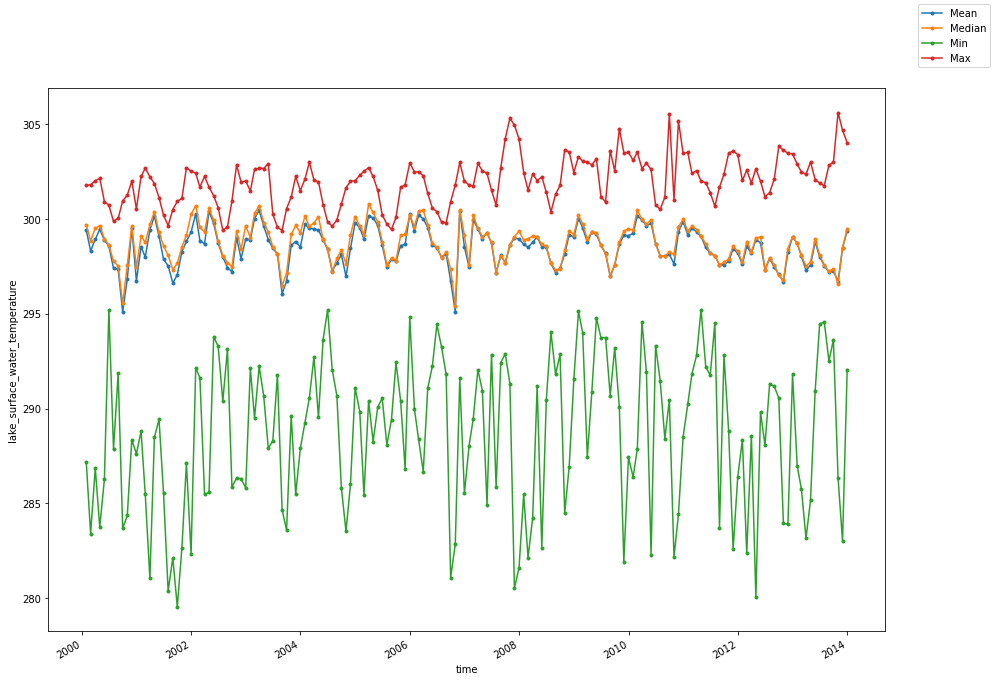

In [5]:
# Now we do some statistics on the whole lake (axis=(1,2) means doing the operation on the first two dimensions, lat and lon).
# In this example, we do it for LSWT
fig2 = plt.figure(figsize=(15,10))
ds.lake_surface_water_temperature.mean(axis=(1,2)).plot(marker='.', label='Mean')
ds.lake_surface_water_temperature.median(axis=(1,2)).plot(marker='.', label='Median')
ds.lake_surface_water_temperature.min(axis=(1,2)).plot(marker='.', label='Min')
ds.lake_surface_water_temperature.max(axis=(1,2)).plot(marker='.', label='Max')

fig2.legend()


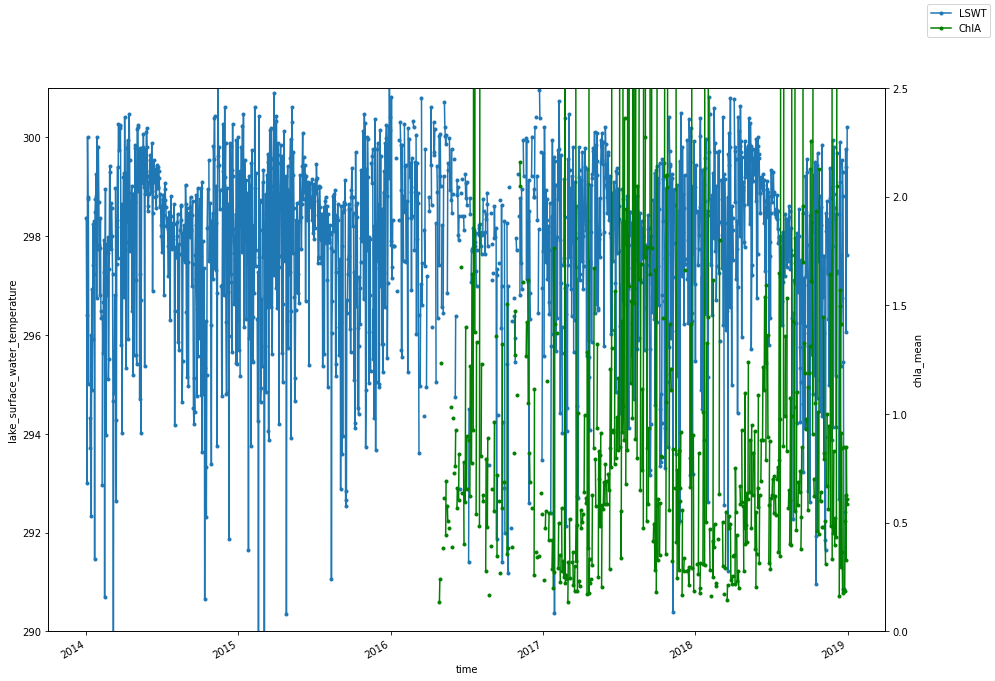

In [3]:
# Finally, we plot means of different variables into one figure

fig3 = plt.figure(figsize=(15,10))
ds.lake_surface_water_temperature.mean(axis=(1,2)).plot(marker='.', label='LSWT')
ax = fig3.gca()
ax.set_ylim([290, 301])

#We create a right-hand side axis for ChlA

ax2 = ax.twinx()
ds.chla_mean.mean(axis=(1,2)).plot(marker='.', color='g', label='ChlA', ax=ax2)
ax2.set_ylim([0,2.5])
fig3.legend()


In [ ]:
#to save the image
fig3.savefig('scatterplot)

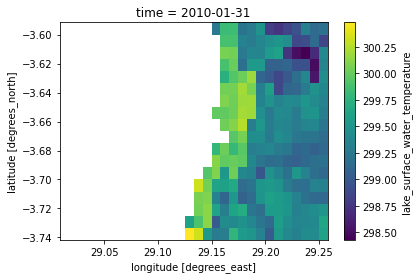

In [30]:
area1= {'time': "2010-01-31", 'lat': slice(-3.745, -3.59), 'lon': slice(29.011,29.262)}
ds.lake_surface_water_temperature.sel(area1).plot()


In [8]:
temperature_region1 = ds.lake_surface_water_temperature.sel(area1)

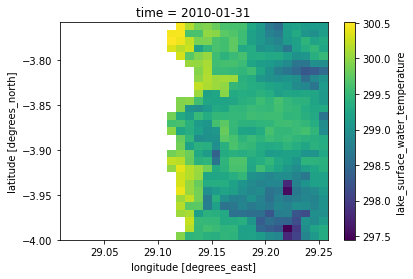

In [9]:
area2= {'time': "2010-01-31", 'lat': slice(-4, -3.756), 'lon': slice(29.011,29.257)}
ds.lake_surface_water_temperature.sel(area2).plot()

In [10]:
temperature_region2 = ds.lake_surface_water_temperature.sel(area2)

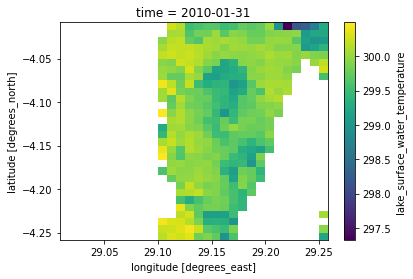

In [11]:
area3= {'time': "2010-01-31", 'lat': slice(-4.259, -4.007), 'lon': slice(29.011,29.257)}
ds.lake_surface_water_temperature.sel(area3).plot()

In [12]:
temperature_region3 = ds.lake_surface_water_temperature.sel(area3)

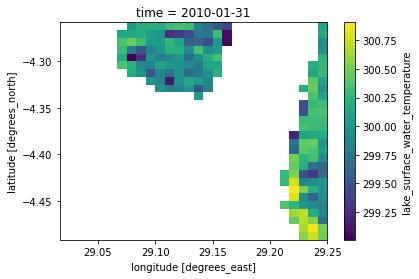

In [13]:
area4= {'time': "2010-01-31", 'lat': slice(-4.495, -4.259), 'lon': slice(29.016,29.251)}
ds.lake_surface_water_temperature.sel(area4).plot()

In [14]:
temperature_region4 = ds.lake_surface_water_temperature.sel(area4)

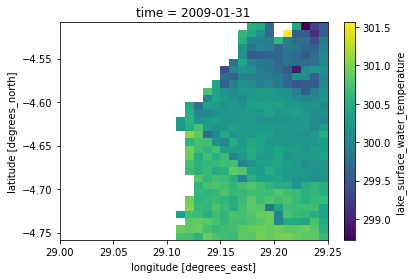

In [15]:
area5= {'time': "2009-01-31", 'lat': slice(-4.757, -4.506), 'lon': slice(29.0,29.251)}
ds.lake_surface_water_temperature.sel(area5).plot()

In [16]:
temperature_region5 = ds.lake_surface_water_temperature.sel(area5)

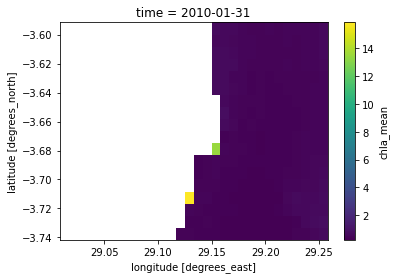

In [17]:
ChlAarea1= {'time': "2010-01-31", 'lat': slice(-3.745, -3.59), 'lon': slice(29.011,29.262)}
ds.chla_mean.sel(ChlAarea1).plot()

In [27]:
ChlA_region1 

<xarray.DataArray 'chla_mean' (lat: 18, lon: 30)>
array([[     nan,      nan,      nan, ..., 0.40952 , 0.491244, 0.623646],
       [     nan,      nan,      nan, ..., 0.57107 , 0.701172, 0.736604],
       [     nan,      nan,      nan, ..., 0.562134, 0.651142, 0.653922],
       ...,
       [     nan,      nan,      nan, ..., 0.447888, 0.4722  , 0.546306],
       [     nan,      nan,      nan, ..., 0.431989, 0.474649, 0.54736 ],
       [     nan,      nan,      nan, ..., 0.443173, 0.470964, 0.553788]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2010-01-31
  * lat      (lat) float32 -3.737 -3.729 -3.721 -3.713 ... -3.612 -3.604 -3.596
  * lon      (lon) float32 29.01 29.02 29.03 29.04 ... 29.23 29.24 29.25 29.25

In [ ]:
fig4 = plt.figure(figsize=(15,10))
ax1 = fig4.add_subplot(111)
#temperature_region1.mean(axis=(1,2)).plot(marker='.', color= 'r', label='Temp_reg1')
temperature_region1.mean(axis=(1,2)).plot(marker='.', color='r', label = 'Temp_reg1', ax=ax1)
ax = fig4.gca()
ax.set_ylim([273, 301])

ax2 = ax.twinx()
ChlA_region1.mean(axis=(1,2)).plot(marker='.', color='g', label='ChlA_region1', ax=ax2)

ax2.set_ylim([-4,14])
fig4.legend()
plt.scatter(ax1, ax2)
plt.show()


In [ ]:
#lat': slice(-3.745, -3.59), 'lon': slice(29.011,29.262)}

In [30]:
print(ds.lat.argmin)

<bound method DataArray.argmin of <xarray.DataArray 'lat' (lat: 720)>
array([-8.995833, -8.9875  , -8.979167, ..., -3.020833, -3.0125  , -3.004167],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -8.996 -8.988 -8.979 -8.971 ... -3.021 -3.013 -3.004
Attributes:
    units:            degrees_north
    standard_name:    latitude
    long_name:        latitude
    valid_min:        -90.0
    valid_max:        90.0
    axis:             Y
    reference_datum:  WGS84 datum
    bounds:           lat_bounds>


In [3]:
#getting values of subset
latbound=[-3.745, -3.59]
longbound=[29.011,29.262]

In [4]:
#getting values for lat, lon, time variables
lats = ds.variables["lat"][:]
lons= ds.variables["lon"][:]
tims = ds.variables["time"][:]
total_step =len(tims)

In [5]:
print(lons.ndim)


1


In [6]:
#calculating the min values of difference between lats, lons of main data and customised boundary
lat_lb = np.argmin(abs(latbound[0]))
lat_ub =np.argmin(abs(latbound [1]))
lon_lb = np.argmin(abs(longbound [0]))
lon_ub = np.argmin(abs(longbound [1]))

In [7]:
lat_sub = ds.variables['lat'][lat_lb:lat_ub]
lon_sub = ds.variables['lon'][lon_lb:lon_ub]

In [36]:
print(lat_sub)

<xarray.IndexVariable 'lat' (lat: 0)>
array([], dtype=float32)
Attributes:
    units:            degrees_north
    standard_name:    latitude
    long_name:        latitude
    valid_min:        -90.0
    valid_max:        90.0
    axis:             Y
    reference_datum:  WGS84 datum
    bounds:           lat_bounds


In [10]:
#setting direction of the subset
my_file= Dataset("Data/area2.nc4","w",format ='NETCDF4' )
my_file.discription = 'subset_area'
my_file.history = 'Created on: '+time.ctime(time.time())

In [11]:
#creating dimension of new variable
Idim = abs(lat_lb-lat_ub)
Indim =abs(lon_ub-lon_lb)
lon=my_file.createDimension('lon',Indim)
lat=my_file.createDimension('lat',Idim)
time =my_file.createDimension('time',None)


In [12]:
#creating variables to be written in the new file

times = my_file.createVariable('time', float , ('time',))
times.units= 'months since 2000-01-01'

In [13]:
print(times.dtype)


float64


In [14]:
latitude = my_file.createVariable('latitude', float, ('lat',))
latitude.units= 'degrees_north'
longitude = my_file.createVariable('longitude', float, ('lon',))
longitude.units= 'degrees_east'

In [15]:
temp = my_file.createVariable('t',float,('time','lat','lon',), fill_value = -9999.0)
temp.units= 'K'

In [16]:
my_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    discription: subset_area
    history: Created on: Thu Jan  6 15:15:19 2022
    dimensions(sizes): lon(0), lat(0), time(0)
    variables(dimensions): float64 time(time), float64 latitude(lat), float64 longitude(lon), float64 t(time, lat, lon)
    groups: 

In [43]:
chla = my_file.createVariable('c',float,('time','lat','lon',), fill_value = -9999.0)
chla.units= 'chla_mean'

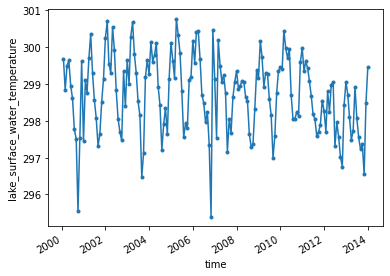

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
ds.chla_mean.median(axis=(1,2)).plot(marker='.')

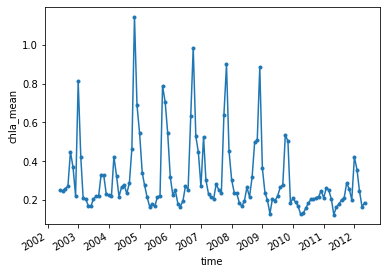

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
ds.chla_mean.median(axis=(1,2)).plot(marker='.')